# Задание 1

In [43]:
import numpy as np
import matplotlib.pyplot as plt
from scipy import optimize
from scipy import stats
from scipy import io as spio
from scipy import misc
import matplotlib.image as mpimg
from scipy import fftpack
from scipy import signal
from scipy import ndimage

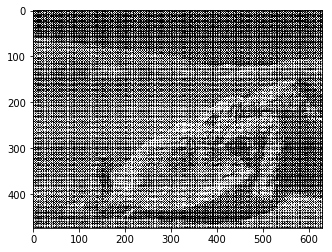

In [5]:
img = plt.imread("http://members.cbio.mines-paristech.fr/~nvaroquaux/formations/scipy-lecture-notes/_images/moonlanding.png")
imgplot = plt.imshow(img, cmap='gray')
plt.show()

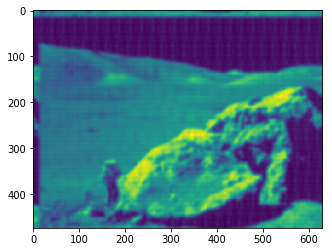

In [9]:
# prepare an 1-D Gaussian convolution kernel
t = np.linspace(-10, 10, 30)
bump = np.exp(-0.1*t**2)
bump /= np.trapz(bump) # normalize the integral to 1

# make a 2-D kernel out of it
kernel = bump[:, np.newaxis] * bump[np.newaxis, :]

# padded fourier transform, with the same shape as the image
kernel_ft = fftpack.fft2(kernel, shape=img.shape[:2], axes=(0, 1))

# convolve
img_ft = fftpack.fft2(img, axes=(0, 1))
img2_ft = kernel_ft[:, :] * img_ft
img2 = fftpack.ifft2(img2_ft, axes=(0, 1)).real

# clip values to range
img2 = np.clip(img2, 0, 1)

# plot output
plt.imshow(img2)
plt.show()

# Задание 2

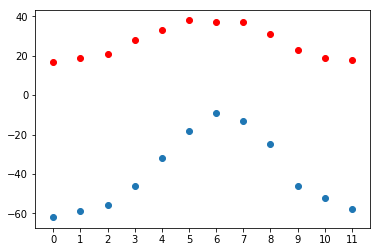

In [11]:
temp_max = [17, 19, 21, 28, 33, 38, 37, 37, 31, 23, 19, 18]
temp_min = [-62, -59, -56, -46, -32, -18, -9, -13, -25, -46, -52, -58]

months = np.arange(12)

plt.scatter(months, temp_max, color = 'red')
plt.scatter(months, temp_min)
plt.xticks(np.arange(0,12,1))

plt.show()

In [12]:
def func(t, a, b, tmax):
    return a*np.sin((t + tmax)*(np.pi/6))+b

In [16]:
X1 = optimize.curve_fit(func, np.arange(12), temp_max, [10, 30, 6])
Y1 = optimize.curve_fit(func, np.arange(12), temp_min, [20, -40, 6])

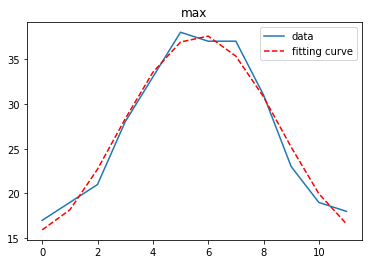

In [27]:
X = np.arange(12)
Y = np.array([func(x, X1[0], X1[1], X1[2]) for x in X])
plt.plot(temp_max, label='data')
plt.plot(X, Y, 'r--',label='fitting curve')
plt.title('max')
plt.legend()
plt.show()

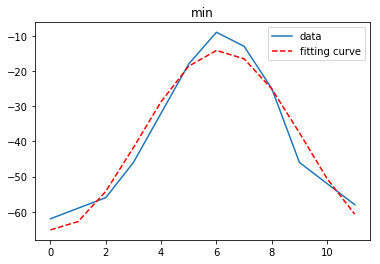

In [26]:
X = np.arange(12)
Y = np.array([func(x, Y1[0], Y1[1], Y1[2]) for x in X])
plt.plot(temp_min, label='data')
plt.plot(X, Y,'r--' ,label='fitting curve')
plt.legend()
plt.title('min')
plt.show()

# Задание 3

Text(0.5,0.92,'Six-hump Camelback function')

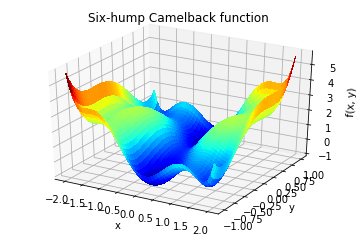

In [29]:
from mpl_toolkits.mplot3d import Axes3D


def sixhump(x):
    return (4 - 2.1*x[0]**2 + x[0]**4 / 3.) * x[0]**2 + x[0] * x[1] + (-4 + \
        4*x[1]**2) * x[1] **2

x = np.linspace(-2, 2)
y = np.linspace(-1, 1)
xg, yg = np.meshgrid(x, y)

#plt.figure()  # simple visualization for use in tutorial
#plt.imshow(sixhump([xg, yg]))
#plt.colorbar()

fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')
surf = ax.plot_surface(xg, yg, sixhump([xg, yg]), rstride=1, cstride=1,
                       cmap=plt.cm.jet, linewidth=0, antialiased=False)

ax.set_xlabel('x')
ax.set_ylabel('y')
ax.set_zlabel('f(x, y)')
ax.set_title('Six-hump Camelback function')

In [30]:
optimize.fmin_bfgs(sixhump, [1, 1])

Optimization terminated successfully.
         Current function value: -1.031628
         Iterations: 13
         Function evaluations: 72
         Gradient evaluations: 18


array([ 0.08984197, -0.71265635])

In [31]:
optimize.fmin_bfgs(sixhump, [0, 0])

Optimization terminated successfully.
         Current function value: 0.000000
         Iterations: 0
         Function evaluations: 4
         Gradient evaluations: 1


array([0, 0])

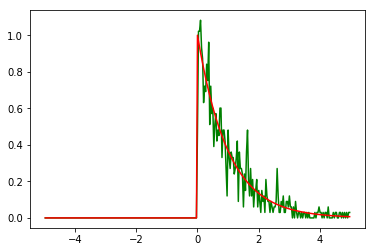

In [39]:
a = np.random.gamma(1,size=1000)
bins = np.linspace(-5, 5, 300)
histogram = np.histogram(a, bins=bins, normed=True)[0]
bins = 0.5*(bins[1:] + bins[:-1])
b = stats.gamma.pdf( bins,1 )
plt.plot(bins, histogram, color = 'green')
plt.plot(bins, b, color = 'red')

# Задание 4

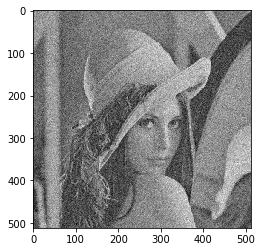

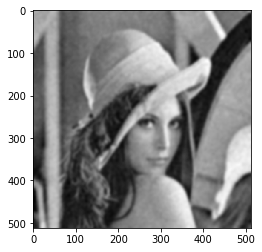

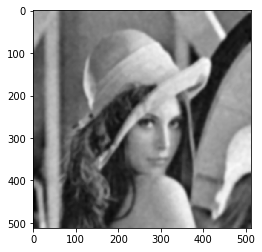

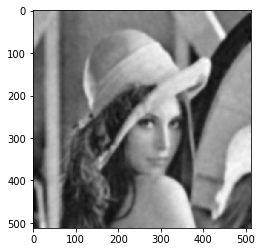

In [44]:
lena = plt.imread('http://members.cbio.mines-paristech.fr/~nvaroquaux/formations/scipy-lecture-notes/_images/lena.png')

shifted_lena = ndimage.shift(lena, (50, 50))
shifted_lena2 = ndimage.shift(lena, (50, 50), mode='nearest')
rotated_lena = ndimage.rotate(lena, 30)
cropped_lena = lena[50:-50, 50:-50]
zoomed_lena = ndimage.zoom(lena, 2)
zoomed_lena.shape

noisy_lena = np.copy(lena).astype(np.float)
noisy_lena += lena.std()*0.5*np.random.standard_normal(lena.shape)
plt.imshow(noisy_lena,plt.cm.gray)
plt.show()

blurred_lena = ndimage.gaussian_filter(noisy_lena, sigma=3)
plt.imshow(blurred_lena,plt.cm.gray)
plt.show()

median_lena = ndimage.median_filter(blurred_lena, size=5)
plt.imshow(median_lena,plt.cm.gray)
plt.show()

wiener_lena = signal.wiener(blurred_lena, (5,5))
plt.imshow(wiener_lena,plt.cm.gray)
plt.show()

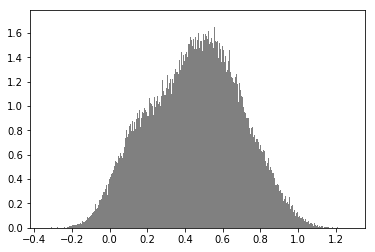

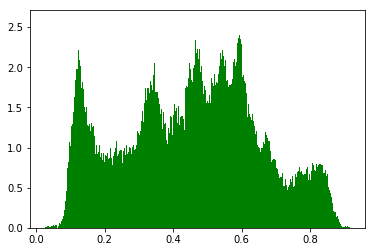

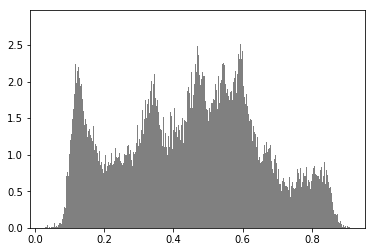

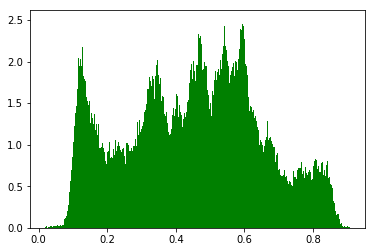

In [46]:
plt.hist(noisy_lena.reshape((-1)), density=1, bins=1000, color = 'gray')
plt.show()
plt.hist(blurred_lena.reshape((-1)), density=1, bins=1000, color = 'green')
plt.show()
plt.hist(median_lena.reshape((-1)), density=1, bins=1000, color = 'gray')
plt.show()
plt.hist(wiener_lena.reshape((-1)), density=1, bins=1000, color = 'green')
plt.show()

# Задание 5

In [50]:
a = np.zeros((7, 7), dtype=np.int)
a[1:6, 2:5] = 1
b = ndimage.binary_erosion(a).astype(a.dtype)
ndimage.binary_dilation(b).astype(a.dtype)

array([[0, 0, 0, 0, 0, 0, 0],
       [0, 0, 0, 1, 0, 0, 0],
       [0, 0, 1, 1, 1, 0, 0],
       [0, 0, 1, 1, 1, 0, 0],
       [0, 0, 1, 1, 1, 0, 0],
       [0, 0, 0, 1, 0, 0, 0],
       [0, 0, 0, 0, 0, 0, 0]])

In [51]:
a = np.zeros((7, 7), dtype=np.int)
a[1:6, 2:5] = 1
ndimage.binary_opening(a).astype(np.int)

array([[0, 0, 0, 0, 0, 0, 0],
       [0, 0, 0, 1, 0, 0, 0],
       [0, 0, 1, 1, 1, 0, 0],
       [0, 0, 1, 1, 1, 0, 0],
       [0, 0, 1, 1, 1, 0, 0],
       [0, 0, 0, 1, 0, 0, 0],
       [0, 0, 0, 0, 0, 0, 0]])

# Задание 6

In [58]:
 a = np.zeros((50, 50))
a[10:-10, 10:-10] = 1
a += 0.25*np.random.standard_normal(a.shape)
mask = a >= 0.5
opened_mask = ndimage.binary_opening(mask)
closed_mask = ndimage.binary_closing(opened_mask)
area = 30*30
area-np.sum(closed_mask) < 30*30

True